In [43]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../../timeseries/')
sys.path.append('../../timeseries/experiments_scripts/')
sys.path.append('../../src/')

import factor
import state_model
import observation_model
from ssm_em import StateSpaceEM
from nonlinear_ssm import NonLinearStateSpace_EM

In [51]:
freq1 = 1.
freq2 = .33
sigma_x, beta = .01, .01

t_range = np.linspace(0,4,1000)
z1 = np.sin(2 * np.pi * freq1 * t_range)
z2 = np.sin(2 * np.pi * freq2 * t_range)

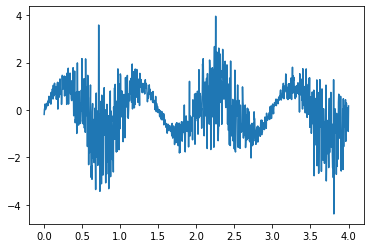

In [52]:
mean = z1
noise = np.sqrt(sigma_x ** 2 + 2 * beta * np.cosh(5 * z2)) * np.random.randn(len(t_range))
x = np.array([mean + noise]).T
plt.plot(t_range, x)

In [107]:
def train_linear_hsk_SSM(x_tr, dz, du, init_w_pca=False, smooth_window=20):

    dx = x_tr.shape[1]
    sm_hs = state_model.LinearStateModel(dz, noise_z=1.)
    #sm_hs.A[:] = 0
    om_hs = observation_model.HCCovObservationModel(dx, dz, du, noise_x=.1)
    om_hs.W = np.random.randn(om_hs.Du, om_hs.Dz + 1)
    om_hs.W[:,:2] = 0 
    om_hs.C[:,1:] = 0 
    if init_w_pca == 1:
        om_hs.pca_init(x_tr, smooth_window=20)
    hs_model = StateSpaceEM(x_tr, observation_model=om_hs, state_model=sm_hs, conv_crit=1e-4)
    hs_model.run()
    
    return hs_model

In [ ]:
hsk_model = train_linear_hsk_SSM(x, 2, 1)

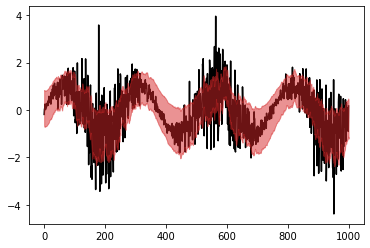

In [106]:
pred_density = hsk_model.compute_predictive_density(x)
pyplot.plot(x, 'k')
mu, std = pred_density.mu, np.sqrt(pred_density.Sigma.diagonal(axis1=1,axis2=2))
lb, ub = mu - std, mu + std
pyplot.fill_between(range(mu.shape[0]), lb[:,0], ub[:,0], alpha=.5, zorder=9, color='C3')

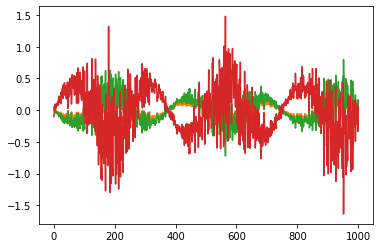

In [76]:
plt.plot(hsk_model.smoothing_density.mu)

In [ ]:
hsk_model.sm.